<a href="https://colab.research.google.com/github/KeysiYTS/price-prediction-description-based/blob/dev/Prediction_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neattext --quiet
!pip install -U sentence-transformers --quiet

     |████████████████████████████████| 112kB 4.0MB/s 
     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 2.3MB 11.4MB/s 
     |████████████████████████████████| 1.2MB 28.4MB/s 
     |████████████████████████████████| 3.3MB 38.7MB/s 
     |████████████████████████████████| 901kB 43.1MB/s 


In [ ]:
!gdown --id 1y6Y4rYWAmZbWBsxZV92eeLcnA27svOii

Downloading...
From: https://drive.google.com/uc?id=1y6Y4rYWAmZbWBsxZV92eeLcnA27svOii
To: /content/train.csv
17.2MB [00:00, 104MB/s]


In [ ]:
!gdown --id 11hUxSKSOEAnjlCKtvPpDJ3QOeGbMcPTC

Downloading...
From: https://drive.google.com/uc?id=11hUxSKSOEAnjlCKtvPpDJ3QOeGbMcPTC
To: /content/test.csv
5.66MB [00:00, 89.1MB/s]


In [ ]:
!pip install wordcloud --quiet

## Libs

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import neattext as nt
import neattext.functions as ntx
import time

In [ ]:
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

CRIAR PIPELINE -> TFID + TREINO
PYTHON MACHINE LEARNING, CAP 9

# Functions

In [ ]:
def vectorize_train(words):
  # tfidf stop -> stop word list
  vectorizer = TfidfVectorizer(max_features = 800)
  fitted_vectorizer = vectorizer.fit(words)
  sentece_vector = fitted_vectorizer.transform(words)
  return sentece_vector, fitted_vectorizer

def vectorize_test(fitted_vectorizer, words):
  sentece_vector = fitted_vectorizer.transform(words)
  return sentece_vector

In [ ]:
def remove_spechar(comment):
  comment = re.sub(r'\W+', ' ', comment)
  return comment

In [ ]:
def remove_stopwords(comment):
  comment = ntx.remove_stopwords(comment)
  return comment

## Getting the file

In [ ]:
file_path = 'train.csv'#'/content/drive/MyDrive/0. Machine Learning/Projetos/Prediction_Description_based/Cópia de train.csv'

In [ ]:
dataset = pd.read_csv(file_path)
dataset.head()

,CloseDate,City,PostalCode,PropertySubType,ArchitecturalStyle,Levels,Sewer,StructureType,SubdivisionName,BathroomsFull,BathroomsHalf,BathroomsTotalInteger,BedroomsTotal,BuildingAreaTotal,DaysOnMarket,ListPrice,OriginalListPrice,YearBuilt,BedrmsAboveGrade,EnsuiteYN,FireplacesTotal,GarageYN,ListPriceSquareFoot,LotSizeSquareFeet,ParkingTotal,NewConstructionYN,RoomsAboveGrade,BuildingAreaTotalMetres,BuildingAreaTotalSF,LivingAreaMetres,LivingAreaSF,PublicRemarks,ClosePrice
0,2016-01-03,Red Deer,T4R,Detached,2 Storey,Two,Sewer,House,Vanier Woods,NaN,NaN,4.0,4.0,1269.0,21.0,379900.0,379900.0,2007.0,NaN,1.0,0.0,1.0,299.3696,3920.0,2.0,0.0,9.0,117.89,1269.0,117.89,1269.0,"Great location in SE Red Deer, close to parks,...",370000.0
1,2016-01-03,Red Deer,T4P,Apartment,Apartment,NaN,Sewer,NaN,Clearview Meadows,2.0,NaN,2.0,2.0,983.0,27.0,199900.0,199900.0,2001.0,NaN,1.0,0.0,0.0,203.3571,NaN,NaN,0.0,7.0,91.32,983.0,91.32,983.0,Main floor one of a kind suite in Legacy Estat...,197000.0
2,2016-01-04,Red Deer,T4P,Semi Detached,Bi-Level,Bi-Level,Sewer,Duplex,Kingsgate,NaN,NaN,2.0,3.0,690.0,41.0,254900.0,254900.0,2004.0,NaN,0.0,0.0,1.0,369.4203,NaN,NaN,0.0,4.0,64.10,690.0,64.10,690.0,Welcome to this immaculate half duplex in Kent...,248500.0
3,2016-01-04,Red Deer,T4P,Detached,NaN,4 Level Split,Sewer,House,Clearview Meadows,3.0,NaN,3.0,6.0,1206.0,26.0,374000.0,374000.0,1989.0,3.0,1.0,1.0,1.0,310.1161,7048.0,NaN,0.0,8.0,112.04,1206.0,112.04,1206.0,For more property details please click on the ...,368000.0
4,2016-01-04,Lethbridge,T1K,Detached,NaN,4 Level Split,Sewer,House,Varsity Village,2.0,1.0,3.0,5.0,1136.0,82.0,279900.0,279900.0,1981.0,3.0,1.0,1.0,1.0,246.3908,5775.0,NaN,0.0,7.0,105.54,1136.0,105.54,1136.0,"WOW! 5 bedroom, 3 bath home right on Nicholas ...",269000.0


## Exploring data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17937 entries, 0 to 17936
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CloseDate                17937 non-null  object 
 1   City                     17937 non-null  object 
 2   PostalCode               17937 non-null  object 
 3   PropertySubType          17388 non-null  object 
 4   ArchitecturalStyle       15895 non-null  object 
 5   Levels                   15536 non-null  object 
 6   Sewer                    17582 non-null  object 
 7   StructureType            14418 non-null  object 
 8   SubdivisionName          17854 non-null  object 
 9   BathroomsFull            14857 non-null  float64
 10  BathroomsHalf            12559 non-null  float64
 11  BathroomsTotalInteger    17568 non-null  float64
 12  BedroomsTotal            17900 non-null  float64
 13  BuildingAreaTotal        17780 non-null  float64
 14  DaysOnMarket          

For this project, I'll try to analyze if the column `PublicRemarks` can pedict the price

## New Dataset

In [ ]:
new_dataset = dataset[['PublicRemarks', 'ClosePrice']]
new_dataset.head()

,PublicRemarks,ClosePrice
0,"Great location in SE Red Deer, close to parks,...",370000.0
1,Main floor one of a kind suite in Legacy Estat...,197000.0
2,Welcome to this immaculate half duplex in Kent...,248500.0
3,For more property details please click on the ...,368000.0
4,"WOW! 5 bedroom, 3 bath home right on Nicholas ...",269000.0


In [ ]:
new_dataset.shape
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17937 entries, 0 to 17936
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PublicRemarks  17937 non-null  object 
 1   ClosePrice     17937 non-null  float64
dtypes: float64(1), object(1)
memory usage: 280.4+ KB


both columns are filled with `17937`, so I won't need to fill empty values
 

### Word Cloud

In [ ]:
# Creating on huge text with 10% of the lines
full_text = " ".join(description for description in new_dataset['PublicRemarks'][:1699])

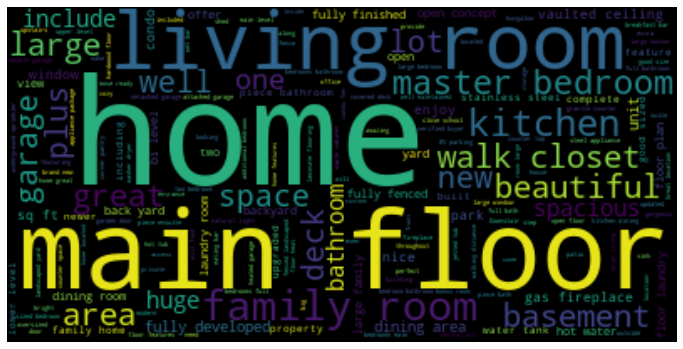

In [ ]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(max_words=200).generate(full_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Treating text

### Convert values to lowercase

In [ ]:
new_dataset['PublicRemarks'] = new_dataset['PublicRemarks'].str.lower()
new_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PublicRemarks,ClosePrice
0,"great location in se red deer, close to parks,...",370000.0
1,main floor one of a kind suite in legacy estat...,197000.0
2,welcome to this immaculate half duplex in kent...,248500.0
3,for more property details please click on the ...,368000.0
4,"wow! 5 bedroom, 3 bath home right on nicholas ...",269000.0


### Remove special characters

In [ ]:
new_dataset['PublicRemarks'] = new_dataset['PublicRemarks'].apply(remove_spechar)
new_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PublicRemarks,ClosePrice
0,great location in se red deer close to parks s...,370000.0
1,main floor one of a kind suite in legacy estat...,197000.0
2,welcome to this immaculate half duplex in kent...,248500.0
3,for more property details please click on the ...,368000.0
4,wow 5 bedroom 3 bath home right on nicholas sh...,269000.0


### Removing stopwords

In [ ]:
new_dataset['PublicRemarks'] = new_dataset['PublicRemarks'].apply(remove_stopwords)
new_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PublicRemarks,ClosePrice
0,great location se red deer close parks schools...,370000.0
1,main floor kind suite legacy estates legacy es...,197000.0
2,welcome immaculate half duplex kentwood home f...,248500.0
3,property details click realtor website link af...,368000.0
4,wow 5 bedroom 3 bath home right nicholas shera...,269000.0


In this case I won't remove numbers. It might be important for the context

### Separating X and Y

In [ ]:
x = new_dataset.drop(columns=['ClosePrice'])
y = new_dataset.drop(columns=['PublicRemarks'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state = 64)

## Vectorizing

### Sentence Transformer

In [ ]:
#vectorizer = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
#start = time.time()
#enconded_sentences = [vectorizer.encode(phrase) for phrase in new_dataset['PublicRemarks'].values]
#end = time.time()
#print("Time to encode the dataset: %.2f seconds" % (end-start))

###tfidf

In [ ]:
start = time.time()
x_train_vec, fitted_vectorizer = vectorize_train(x_train['PublicRemarks'])
end = time.time()
print("Time to vectorize: %.2f seconds" % (end-start))

Time to vectorize: 1.95 seconds


## Estimators

### Linear Regression

In [ ]:
lregression = LinearRegression()

In [ ]:
lregression.fit(x_train_vec, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Ridge

In [ ]:
ridge = Ridge(max_iter=10, random_state=64)

In [ ]:
ridge.fit(x_train_vec, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      random_state=64, solver='auto', tol=0.001)

### Bayesian Ridge

In [ ]:
bayesian_ridge = BayesianRidge()
array_x_train_vec = x_train_vec.toarray()

In [ ]:
bayesian_ridge.fit(array_x_train_vec, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

### Random forest

In [ ]:
rforest = RandomForestRegressor()
rforest.fit(x_train_vec, y_train['ClosePrice'].values)

KeyboardInterrupt: ignored

## Validation

In [ ]:
x_test_vec = vectorize_test(fitted_vectorizer, x_test['PublicRemarks'])

### Linear Regression

In [ ]:
lregression_predictions = lregression.predict(x_test_vec)

In [ ]:
accuracy = lregression.score(x_test_vec, y_test)
print("The Linear Regression R² is: %.2f%%" % (accuracy*100))

The Linear Regression R² is: 34.11%


### Ridge

In [ ]:
ridge_predictions = ridge.predict(x_test_vec)

In [ ]:
accuracy = ridge.score(x_test_vec, y_test)
print("The Ridge R² is: %.2f%%" % (accuracy*100))

The Ridge R² is: 34.62%


### Bayesian Ridge

In [ ]:
bayesian_ridge_prediction = bayesian_ridge.predict(x_test_vec)

In [ ]:
accuracy = bayesian_ridge.score(x_test_vec, y_test)
print("The Bayesian ridge R² is: %.2f%%" % (accuracy*100))

The Bayesian ridge R² is: 34.96%


### Random Forest

In [ ]:
#accuracy = rforest.score(x_test_vec, y_test)
#print("The rforest R² is: %.2f%%" % (accuracy*100))

## Test file

In [ ]:
test_filepath = 'test.csv'#'/content/drive/MyDrive/0. Machine Learning/Projetos/Prediction_Description_based/Cópia de test.csv'

In [ ]:
test_dataset = pd.read_csv(test_filepath)
test_dataset.head()

,CloseDate,City,PostalCode,PropertySubType,ArchitecturalStyle,Levels,Sewer,StructureType,SubdivisionName,BathroomsFull,BathroomsHalf,BathroomsTotalInteger,BedroomsTotal,BuildingAreaTotal,DaysOnMarket,ListPrice,OriginalListPrice,YearBuilt,BedrmsAboveGrade,EnsuiteYN,FireplacesTotal,GarageYN,ListPriceSquareFoot,LotSizeSquareFeet,ParkingTotal,NewConstructionYN,RoomsAboveGrade,BuildingAreaTotalMetres,BuildingAreaTotalSF,LivingAreaMetres,LivingAreaSF,PublicRemarks,ClosePrice
0,2020-06-02,Lethbridge,T1K,Detached,NaN,4 Level Split,Sewer,House,Indian Battle Heights,2.0,0.0,2.0,3.0,924.0,14.0,274900.0,274900.0,2002.0,2.0,NaN,0.0,0.0,297.5108,NaN,NaN,NaN,NaN,85.84,924.0,85.84,924.0,Largely renovated Fully Developed Avonlea buil...,268000.0
1,2020-06-02,Red Deer,T4N,NaN,NaN,NaN,NaN,NaN,Downtown Red Deer,NaN,NaN,NaN,NaN,2430.0,232.0,716850.0,716850.0,2012.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,225.75,2430.0,2430.00,2430.0,Commercial Condo for lease or sale in the high...,625500.0
2,2020-06-02,Lethbridge,T1J,Detached,2 Storey,Two,Sewer,House,Copperwood,2.0,1.0,3.0,2.0,1960.0,94.0,388900.0,394900.0,2013.0,3.0,NaN,1.0,1.0,198.4184,NaN,NaN,NaN,NaN,182.09,1960.0,182.09,1960.0,Check out the amazing value in this 3 bedroom ...,380000.0
3,2020-06-02,Medicine Hat,T1B,Detached,Bi-Level,Bi-Level,Sewer,House,SE Southridge,3.0,0.0,3.0,6.0,1495.0,232.0,349900.0,369900.0,1989.0,3.0,0.0,NaN,1.0,NaN,NaN,NaN,0.0,6.0,138.89,1495.0,138.89,1495.0,Southridge hosts this well designed 1495 sq ft...,325000.0
4,2020-06-02,Lethbridge,T1K,Detached,NaN,One,Sewer,House,Ridgewood,2.0,1.0,3.0,4.0,0.0,1.0,309900.0,309900.0,1987.0,2.0,1.0,1.0,1.0,240.6056,6760.0,2.0,0.0,2.0,0.00,0.0,119.66,1288.0,"This home, located in West Lethbridge, is the ...",305000.0


In [ ]:
new_test = test_dataset[['PublicRemarks', 'ClosePrice']]
new_test

,PublicRemarks,ClosePrice
0,Largely renovated Fully Developed Avonlea buil...,268000.0
1,Commercial Condo for lease or sale in the high...,625500.0
2,Check out the amazing value in this 3 bedroom ...,380000.0
3,Southridge hosts this well designed 1495 sq ft...,325000.0
4,"This home, located in West Lethbridge, is the ...",305000.0
...,...,...
4909,Copperwood beauty! Meticulously maintained fam...,358000.0
4910,"Looking for a single level, 3 bedroom condo on...",184500.0
4911,Looking for easy living?!? This low-maintenanc...,333500.0
4912,For more info click Multimedia - Natural light...,359000.0


In [ ]:
new_test['PublicRemarks'] = new_test['PublicRemarks'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_test['PublicRemarks'] = new_test['PublicRemarks'].apply(remove_spechar)
new_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PublicRemarks,ClosePrice
0,largely renovated fully developed avonlea buil...,268000.0
1,commercial condo for lease or sale in the high...,625500.0
2,check out the amazing value in this 3 bedroom ...,380000.0
3,southridge hosts this well designed 1495 sq ft...,325000.0
4,this home located in west lethbridge is the pe...,305000.0


In [ ]:
new_test['PublicRemarks'] = new_test['PublicRemarks'].apply(remove_stopwords)
new_test.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PublicRemarks,ClosePrice
4909,copperwood beauty meticulously maintained fami...,358000.0
4910,looking single level 3 bedroom condo south clo...,184500.0
4911,looking easy living low maintenance home provi...,333500.0
4912,info click multimedia natural lighting large b...,359000.0
4913,spacious walk bungalow quiet cul de sac close ...,375000.0


### X and Y

In [ ]:
x_new_test = new_test.drop(columns=['ClosePrice'])
y_new_test = new_test.drop(columns=['PublicRemarks'])

In [ ]:
x_new_test.shape,y_new_test.shape

((4914, 1), (4914, 1))

### Vectorizing

In [ ]:
x_new_test_vec = vectorize_test(fitted_vectorizer, x_new_test['PublicRemarks'])

## Predictions

### Linear Regression

In [ ]:
full_lregression_pred = lregression.predict(x_new_test_vec)

In [ ]:
full_accuracy =lregression.score(x_new_test_vec, y_new_test)
print("The Linear regression R² is: %.2f%%" % (full_accuracy*100))

The Linear regression R² is: 45.78%


In [ ]:
words = fitted_vectorizer.get_feature_names()

In [ ]:
weights = pd.DataFrame(zip(words,lregression.coef_[0]))

In [ ]:
weights.sort_values(by=1, ascending=True)

,0,1
465,mobile,-328820.113354
408,lease,-301221.299653
303,footage,-256116.740465
509,overhead,-231439.739193
590,rent,-206048.361669
...,...,...
733,triple,294298.057233
294,fireplaces,312831.588909
264,executive,331890.571506
263,exceptional,372827.103650


In [ ]:
lregression.intercept_

array([215621.62741009])

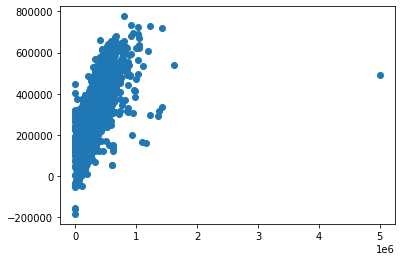

In [ ]:
plt.scatter(y_new_test, full_lregression_pred)

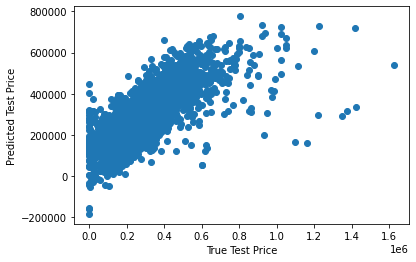

In [ ]:
idx_outlier = y_new_test['ClosePrice'].values<3e6
plt.scatter(y_new_test[idx_outlier], full_lregression_pred[idx_outlier])
plt.ylabel('Predicted Test Price')
plt.xlabel('True Test Price')
plt.show()

In [ ]:
y = y_new_test[idx_outlier]
y_pred = full_lregression_pred[idx_outlier]

In [ ]:
import numpy as np
def mape(y, y_pred, min_value=100000):
  idx_filter = y['ClosePrice'].values>min_value
  return np.mean(np.abs((y[idx_filter]-y_pred[idx_filter])/y))

print(mape(y_new_test[idx_outlier], full_lregression_pred[idx_outlier]))

ClosePrice    0.202217
dtype: float64


In [ ]:
from sklearn.metrics import r2_score
r2_score(y[idx_filter], y_pred[idx_filter])

0.5122825583349371

In [ ]:
importance = pd.Series(lregression.coef_[0], index=words)

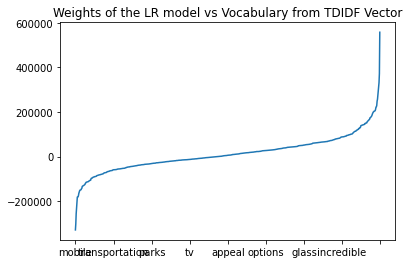

In [ ]:
_=importance.sort_values().plot(title='Weights of the LR model vs Vocabulary from TDIDF Vector')

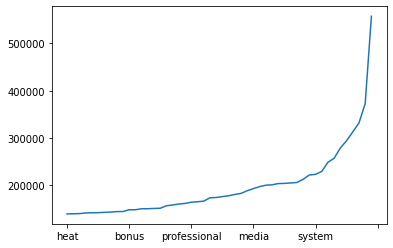

In [ ]:
importance.sort_values().tail(50).plot()

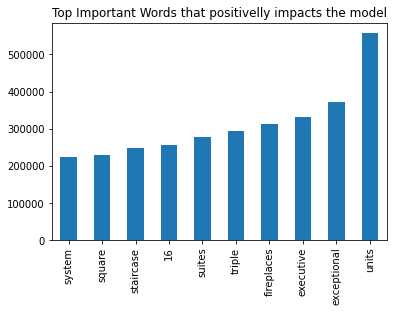

In [ ]:
_=importance.sort_values().tail(10).plot.bar(title='Top Important Words that positivelly impacts the model')

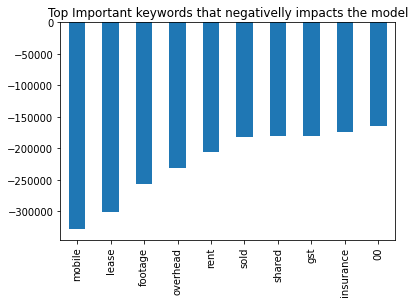

In [ ]:
_=importance.sort_values().head(10).plot.bar(title='Top Important keywords that negativelly impacts the model')

### Ridge

In [ ]:
ridge_predictions = ridge.predict(x_new_test_vec)

In [ ]:
full_accuracy = ridge.score(x_new_test_vec, y_new_test)
print("The Ridge R² is: %.2f%%" % (full_accuracy*100))

The Ridge R² is: 46.50%


### Bayesian Ridge

In [ ]:
array_x_new_test_vec = x_new_test_vec.toarray()
bayesian_ridge_predictions = bayesian_ridge.predict(array_x_new_test_vec)

In [ ]:
full_accuracy = bayesian_ridge.score(array_x_new_test_vec, y_new_test)
print("The Bayesian Ridge R² is: %.2f%%" % (full_accuracy*100))

The Bayesian Ridge R² is: 46.80%
